# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 5 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Каждая задача оценивается в 10 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = 10000
THETA = 1

sample = sps.uniform.rvs(size=N, loc=0, scale=THETA)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
# 2X
estimates1 = np.array([ 2 * sum(sample[0:n]) / n for n in range(1, N + 1)])

# X + X_max / 2
estimates2 = np.array([sum(sample[0:n]) / n + max(sample[0:n]/2) for n in range(1, N + 1)])

# (n + 1)*X_min
estimates3 = np.array([(n + 1) * min(sample[0:n]) for n in range(1, N + 1)])

# X_min + X_max
estimates4 = np.array([min(sample[0:n]) + max(sample[0:n]) for n in range(1, N + 1)])

# (n + 1)/n * X_max
estimates5 = np.array([(n + 1)/(1.0 * n) * max(sample[0:n]) for n in range(1, N + 1)])


Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

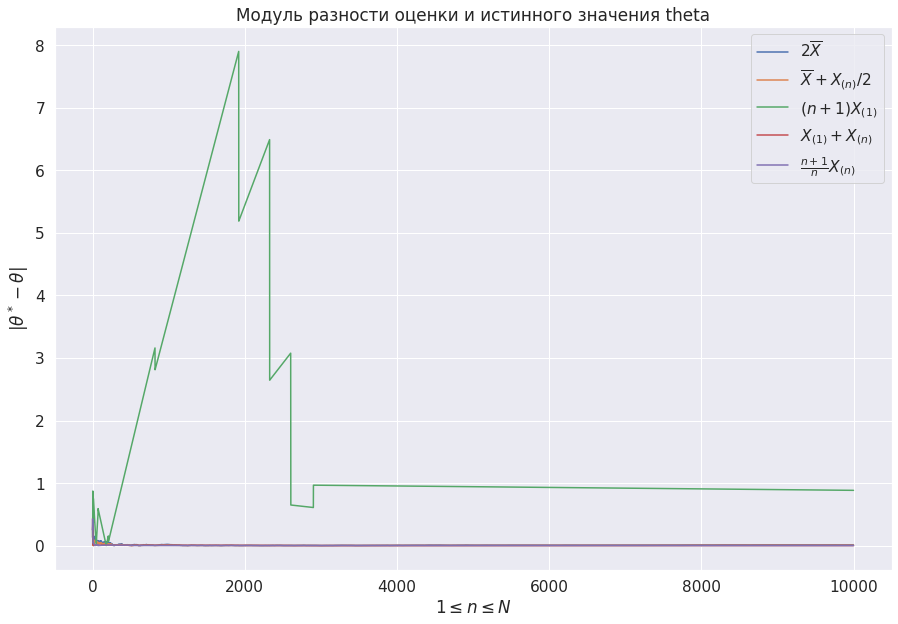

In [5]:
diff_estimates1 = np.abs(estimates1 - THETA)
diff_estimates2 = np.abs(estimates2 - THETA)
diff_estimates3 = np.abs(estimates3 - THETA)
diff_estimates4 = np.abs(estimates4 - THETA)
diff_estimates5 = np.abs(estimates5 - THETA)



plt.figure(figsize=(15, 10))
plt.title('Модуль разности оценки и истинного значения theta')
plt.plot(
  np.linspace(0, N, N),
  diff_estimates1,
  label='$2\overline{X}$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates2,
  label='$\overline{X} + X_{(n)}/2$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates3,
  label='$(n + 1)X_{(1)}$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates4,
  label='$X_{(1)} + X_{(n)}$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates5,
  label='$\\frac{n + 1}{n}X_{(n)}$'
)
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^* - θ|$')
plt.legend()
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

Оценка $(n + 1)X_{(1)}$ очевидно не подходит. Посмотрим на график без этой оценки.

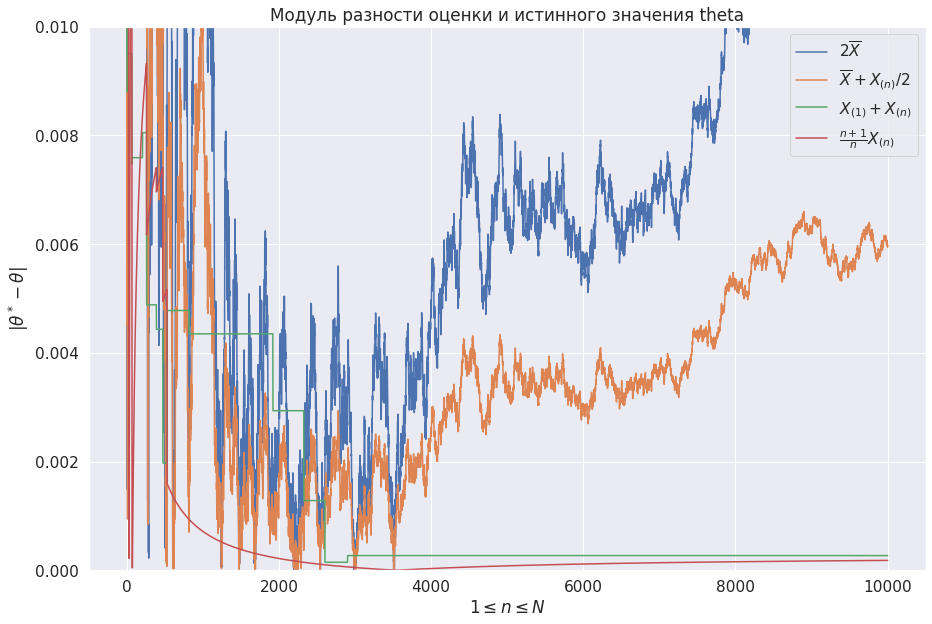

In [6]:
plt.figure(figsize=(15, 10))
plt.title('Модуль разности оценки и истинного значения theta')
plt.ylim((.0, .01))
plt.plot(
  np.linspace(0, N, N),
  diff_estimates1,
  label='$2\overline{X}$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates2,
  label='$\overline{X} + X_{(n)}/2$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates4,
  label='$X_{(1)} + X_{(n)}$'
)
plt.plot(
  np.linspace(0, N, N),
  diff_estimates5,
  label='$\\frac{n + 1}{n}X_{(n)}$'
)
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^* - θ|$')
plt.legend()
plt.show()

__Ответ:__ 

Оценка $ \frac{n + 1}{n}X_{(n)} $ - лучшая

Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

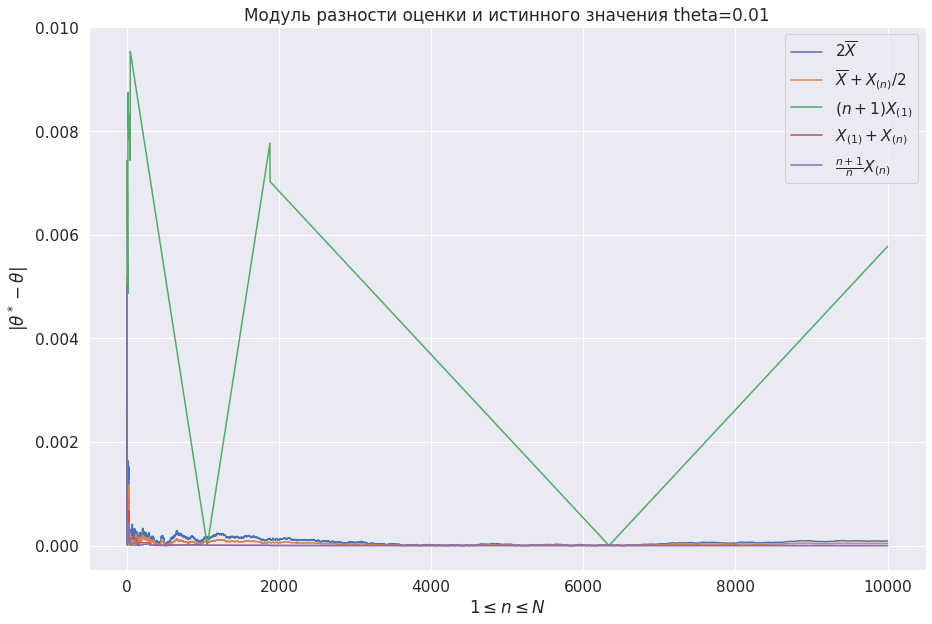

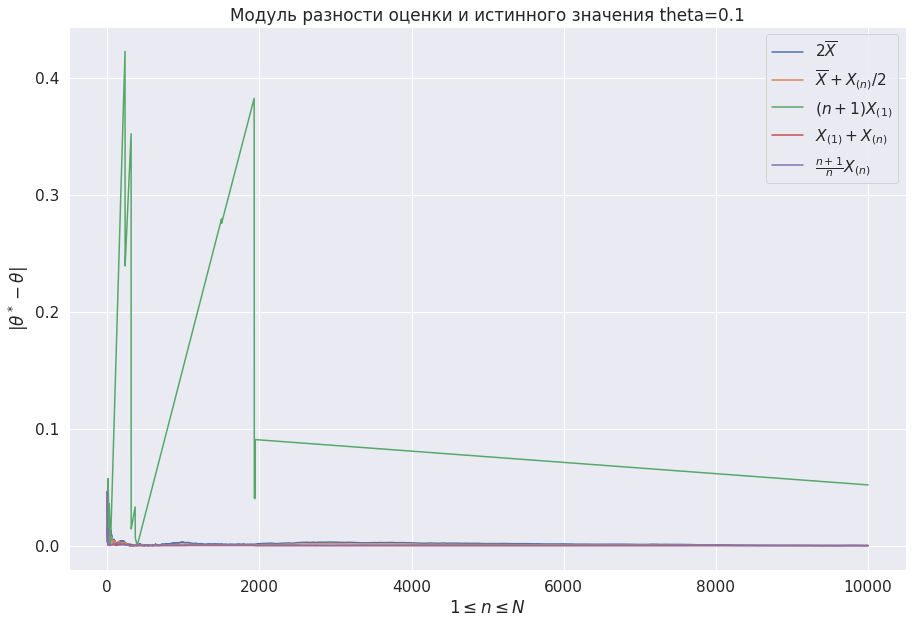

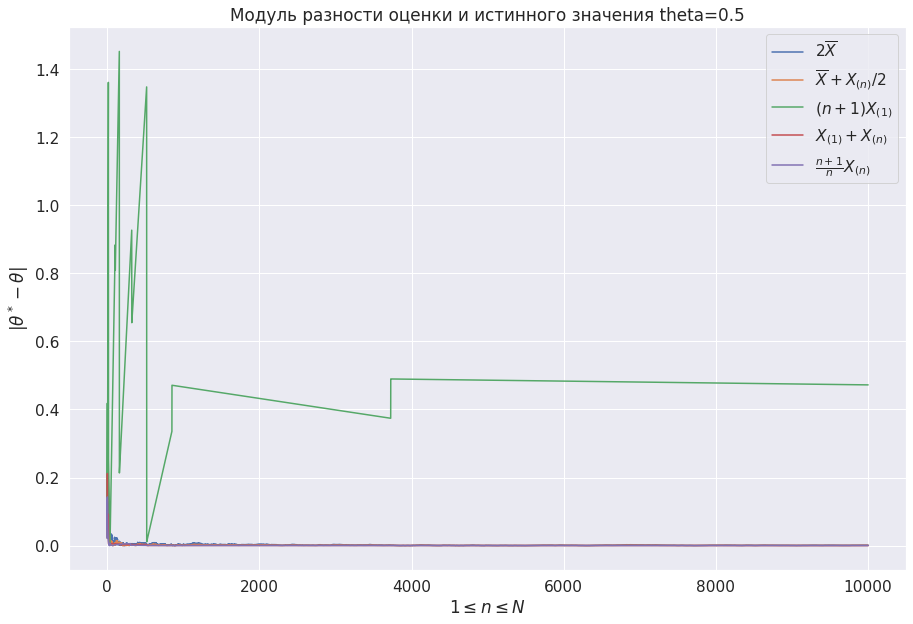

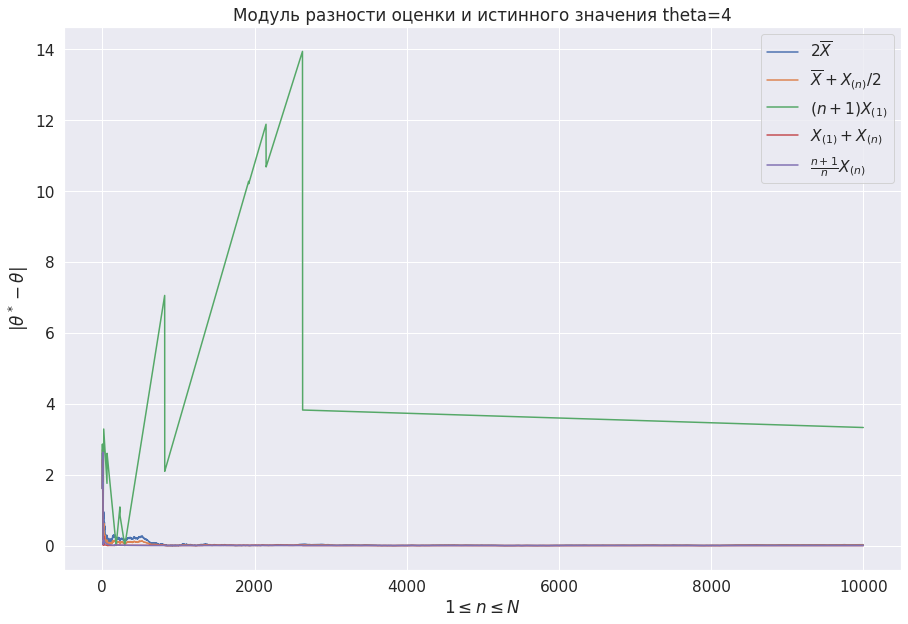

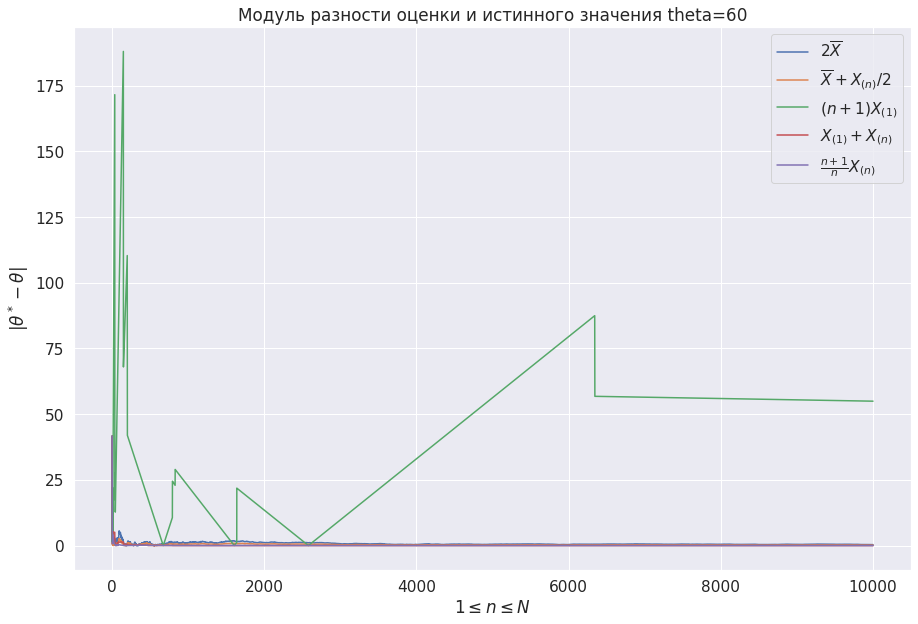

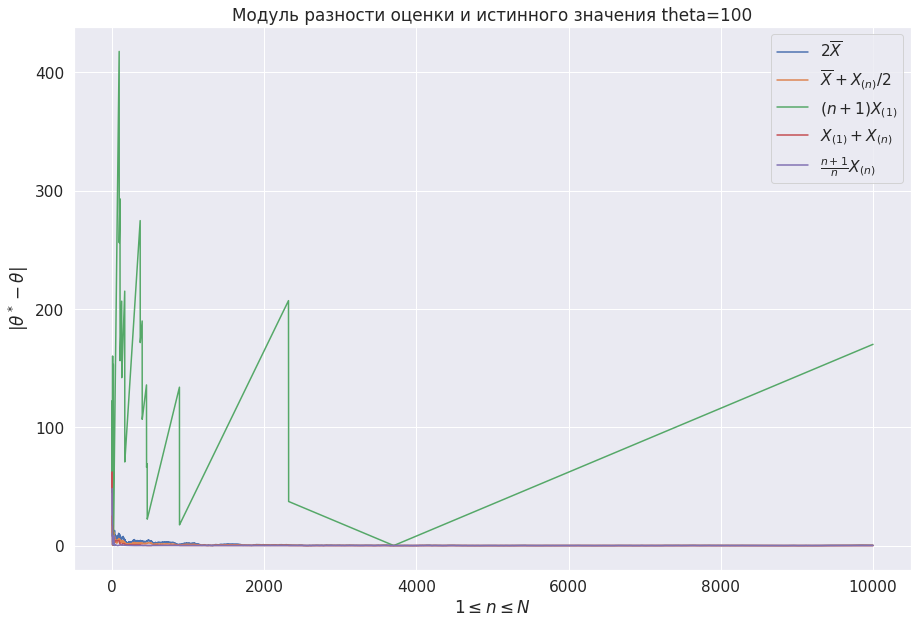

In [7]:
def experiment(theta):
    sample = sps.uniform.rvs(size=N, loc=0, scale=theta)
    
    estimates1 = np.array([ 2 * sum(sample[0:n]) / n for n in range(1, N + 1)])
    estimates2 = np.array([sum(sample[0:n]) / n + max(sample[0:n])/2 for n in range(1, N + 1)])
    estimates3 = np.array([(n + 1) * min(sample[0:n]) for n in range(1, N + 1)])
    estimates4 = np.array([min(sample[0:n]) + max(sample[0:n]) for n in range(1, N + 1)])
    estimates5 = np.array([(n + 1)/(1.0 * n) * max(sample[0:n]) for n in range(1, N + 1)])
    
    diff_estimates1 = np.abs(estimates1 - theta)
    diff_estimates2 = np.abs(estimates2 - theta)
    diff_estimates3 = np.abs(estimates3 - theta)
    diff_estimates4 = np.abs(estimates4 - theta)
    diff_estimates5 = np.abs(estimates5 - theta)

    plt.figure(figsize=(15, 10))
    plt.title('Модуль разности оценки и истинного значения theta={0}'.format(theta))
    plt.plot(
      np.linspace(0, N, N),
      diff_estimates1,
      label='$2\overline{X}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      diff_estimates2,
      label='$\overline{X} + X_{(n)}/2$'
    )
    plt.plot(
      np.linspace(0, N, N),
      diff_estimates3,
      label='$(n + 1)X_{(1)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      diff_estimates4,
      label='$X_{(1)} + X_{(n)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      diff_estimates5,
      label='$\\frac{n + 1}{n}X_{(n)}$'
    )
    plt.xlabel('$1\leq n \leq N$')
    plt.ylabel('$|θ^* - θ|$')
    plt.legend()
    plt.show()
    
    
for theta in [0.01, 0.1, 0.5, 4, 60, 100]:
    experiment(theta)

Сделайте вывод.


__Вывод:__

Наилучшим поведением обладают оценки: $ \frac{n + 1}{n}X_{(n)} $ и $X_{(1)} + X_{(n)}$

Наихудшим поведением обладают оценка: $(n + 1)X_{(1)}$

Кроме того, мы на практике убелись, что оценка $(n + 1)X_{(1)}$ является несостоятельной.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [8]:
N = 10000
THETA = 1

sample = sps.expon.rvs(size=N, loc=0, scale=THETA)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

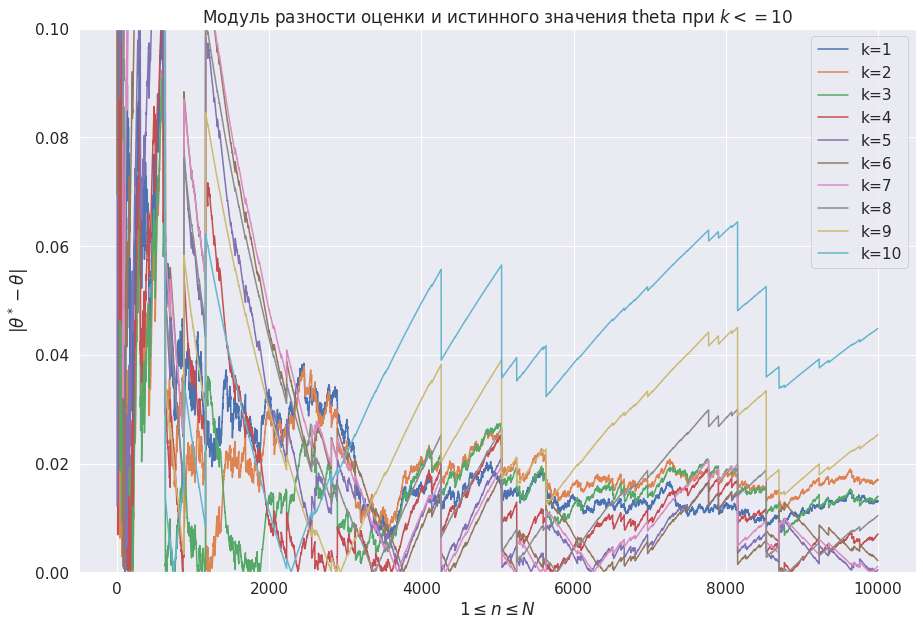

In [10]:
def factorial(k):
    ans = 1
    for i in range(2, k + 1):
        ans *= i
    return ans
    
plt.figure(figsize=(15, 10))
plt.ylim((0., .1))
plt.title('Модуль разности оценки и истинного значения theta при $k <= 10$')

for k in range(1, 11):
    estimates = np.array(
        [(factorial(k)/(sum(sample[0:n]** k) / n)) ** (1.0 / k) for n in range(1, N + 1)]
         )
    diff_estimates = np.abs(estimates - THETA)
    plt.plot(np.linspace(0, N, N), diff_estimates, label=('k={0}'.format(k)))

plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^* - θ|$')
plt.legend()
plt.show()

__1.__ По графикам видно, что рассматривать значения k >= 8 нет смысла, т.к. оценка становится только хуже. Сравним графики при первых 7 значениях k.

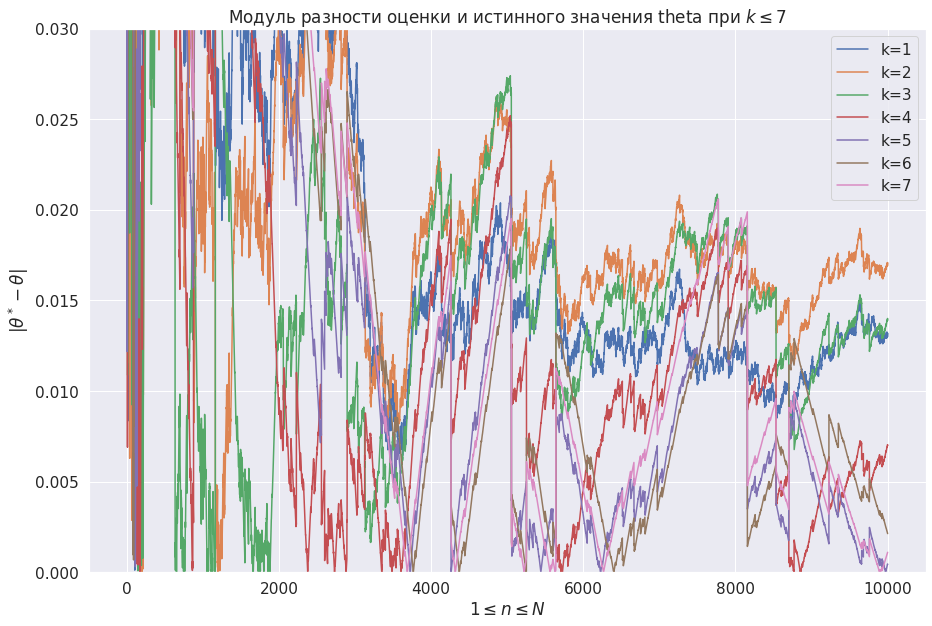

In [11]:
plt.figure(figsize=(15, 10))
plt.ylim((0., .03))
plt.title('Модуль разности оценки и истинного значения theta при $k \leq 7$')

for k in range(1, 8):
    estimates = np.array(
        [(factorial(k)/(sum(sample[0:n]** k) / n)) ** (1.0 / k) for n in range(1, N + 1)]
         )
    diff_estimates = np.abs(estimates - THETA)
    plt.plot(np.linspace(0, N, N), diff_estimates, label=('k={0}'.format(k)))

plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^* - θ|$')
plt.legend()
plt.show()

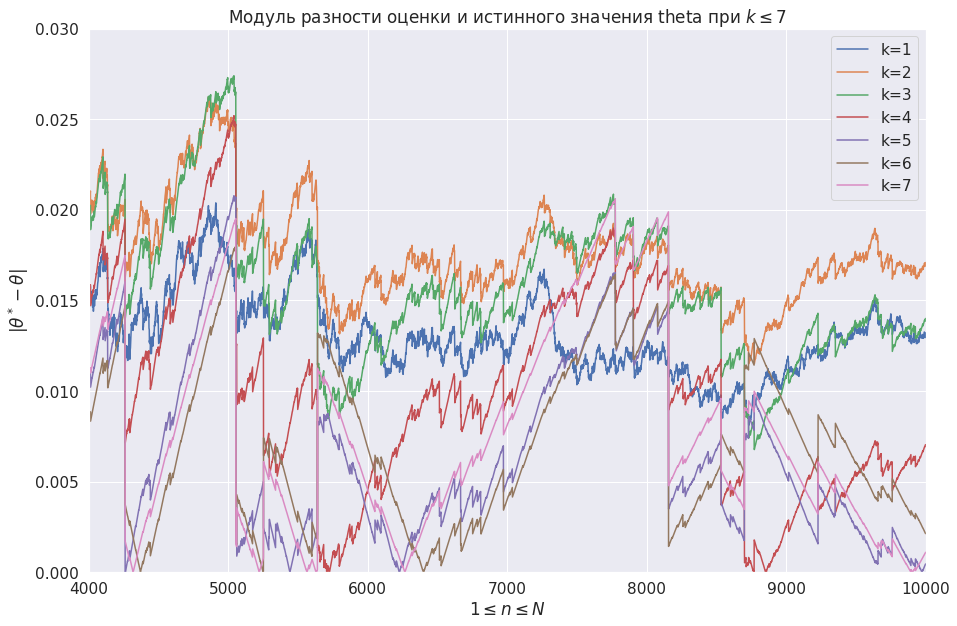

In [12]:
plt.figure(figsize=(15, 10))
plt.ylim((0., .03))
plt.xlim((4000, 10000))
plt.title('Модуль разности оценки и истинного значения theta при $k \leq 7$')

for k in range(1, 8):
    estimates = np.array(
        [(factorial(k)/(sum(sample[0:n]** k) / n)) ** (1.0 / k) for n in range(1, N + 1)]
         )
    diff_estimates = np.abs(estimates - THETA)
    plt.plot(np.linspace(0, N, N), diff_estimates, label=('k={0}'.format(k)))

plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^* - θ|$')
plt.legend()
plt.show()

Сделайте вывод.


__Вывод:__
 - При $N \in (0, 2000] $ - наилучшая оценка достигается при $k=3$
 - При $N \in (2000, 3900] $ - наилучшая оценка достигается при $k=4$
 - При $N \in (3900, 10000] $ - наилучшее поведение имеет оценка при $k=6$, при больших значениях k оценка ухудшаетя
 
 Т.е. лучшее поведение достигается при k = 6

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

__Распределение__:
- $ \underset{\mathbb{(1;+\infty)}}{\int} \frac{1}{x^{\alpha}} dx $ - сходится при $\alpha > 1$ и расходится при $\alpha <= 1$
  
  Значит, можно взять распределение с плотностью $p(x) = \frac{5}{x^{6}}I(x > =1)$
  - 1-ый момент: $\underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^{5}} < +\infty$
  - 2-ый момент: $\underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^{4}} < +\infty$
  - 3-ый момент: $\underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^{3}} < +\infty$
  - 4-ый момент: $\underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^{2}} < +\infty$
  - 5-ый момент: $\underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x} = +\infty$

  
  - $F(x) = \underset{\mathbb{(1;x)}}{\int}\frac{5dt}{t^6} = 1 - \frac{1}{x^5}$ - при $x > = 1$
  - $F(x) = 0$ - при $x < 1$


In [13]:
N = 10000

from scipy.stats import rv_continuous

class my_distribution(rv_continuous):
    def _pdf(self, x):
        return np.where( x >= 1, 5./x**6, 0.)
    def _cdf(self, x):
        return np.where( x >= 1, 1 - 1./x**5, 0.)

distribution = my_distribution(name='my_distribution')
sample = distribution.rvs(size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

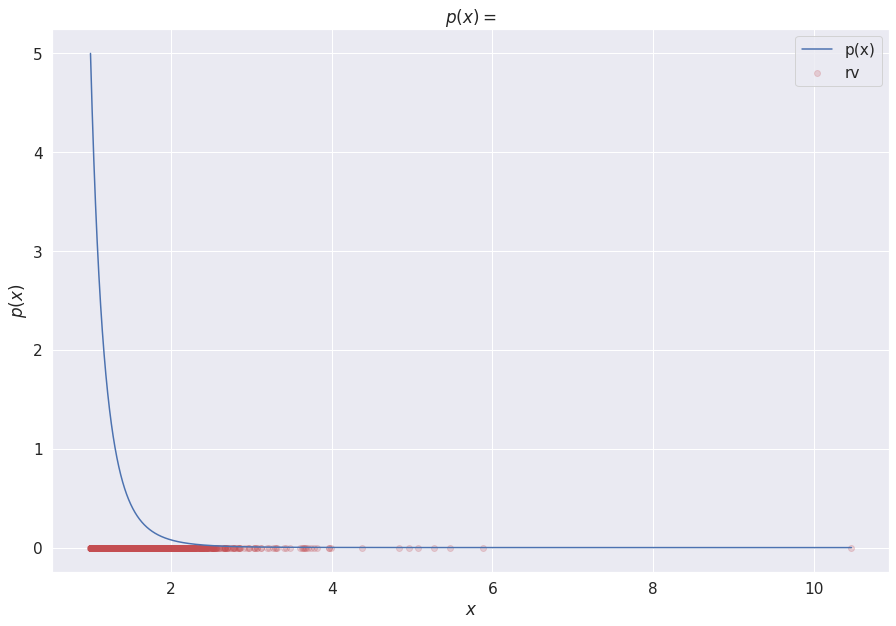

In [14]:
plt.figure(figsize=(15, 10))
plt.title('$p(x) = \frac{5}{x^6}I(x>=1)$')

plt.scatter(sample, np.zeros(N), alpha=0.2, color = 'r',linewidths=1, label="rv")
x = np.linspace(sample.min(), sample.max(), N)
y = distribution.pdf(x)

plt.plot(x, y, label="p(x)")
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [15]:
estimates = np.array([1./n * sum((sample[0:n] - 1./n * sum(sample[0:n]))**2)
                      for n in range(1, N + 1)])

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

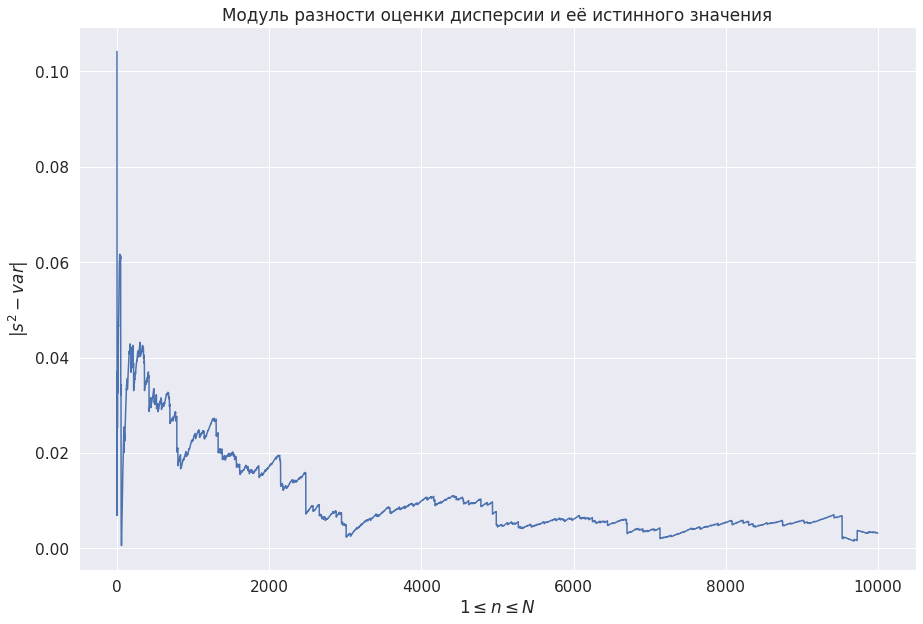

In [16]:
#Истиное значение дисперсии
var = 5./48
diff_estimates = np.abs(estimates - var)

plt.figure(figsize=(15, 10))
plt.title('Модуль разности оценки дисперсии и её истинного значения')
plt.plot(
  np.linspace(0, N, N),
  diff_estimates,
)
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|s^2 - var|$')
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


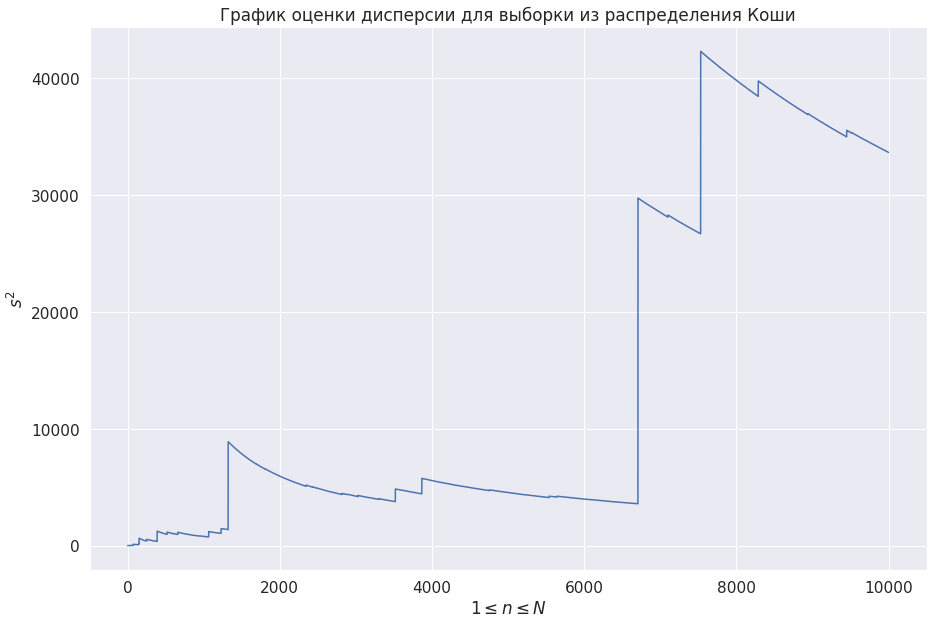

In [17]:
sample = sps.cauchy.rvs(size=N)
estimates = np.array([1./n * sum((sample[0:n] - 1./n * sum(sample[0:n])) ** 2) 
                      for n in range(1, N + 1)])

plt.figure(figsize=(15, 10))
plt.title('График оценки дисперсии для выборки из распределения Коши')

plt.plot(
  np.linspace(0, N, N),
  estimates,
)
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$s^2$')
plt.show()

__Вывод__: С ростом выборки - оценка дисперсии (для выборки из распредления Коши) растёт.

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [18]:
sample = sps.norm.rvs(size=N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [19]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdf = np.array([ECDF(sample[0:n]) for n in range(1, N + 1)])

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

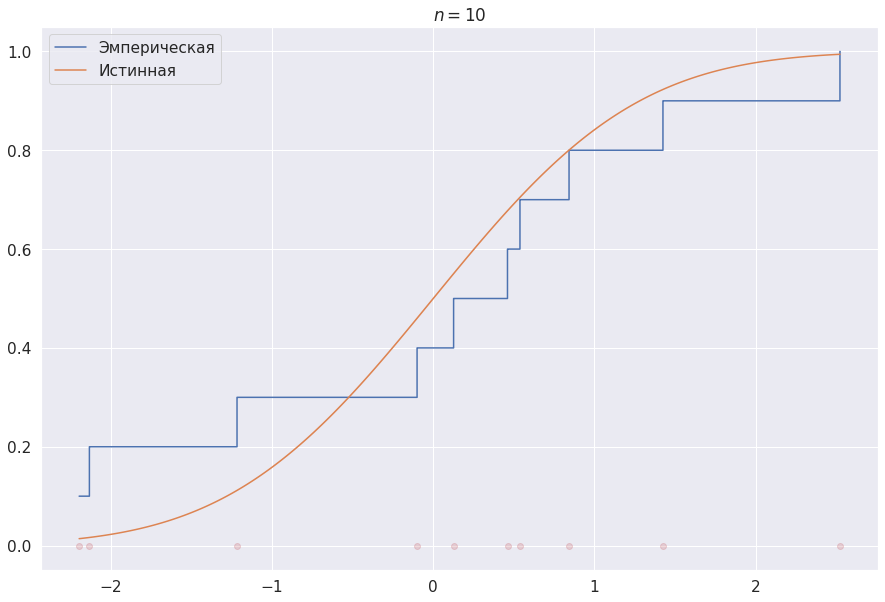

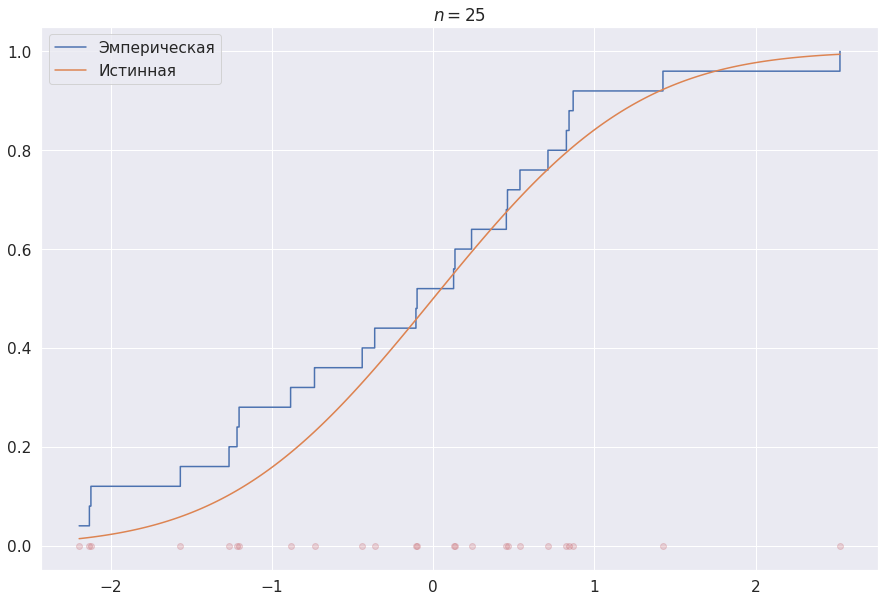

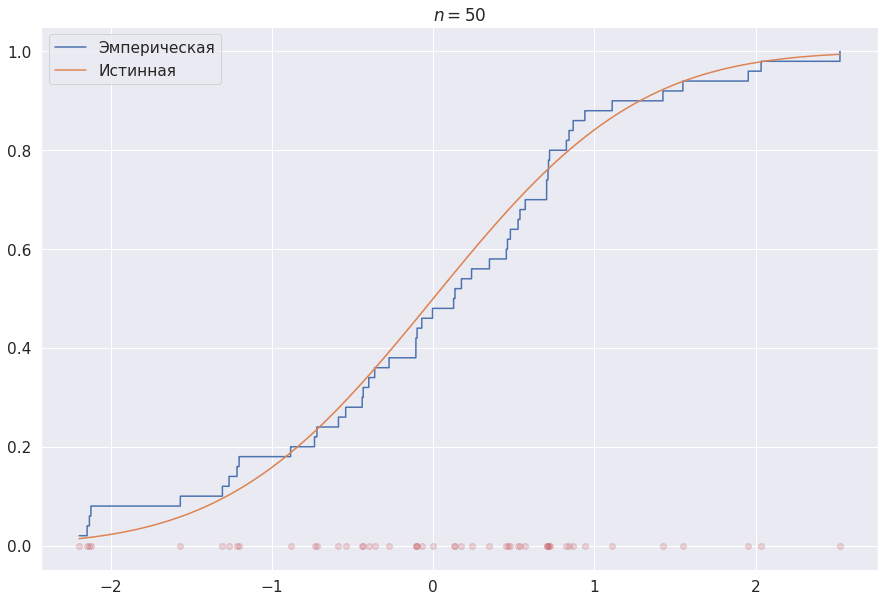

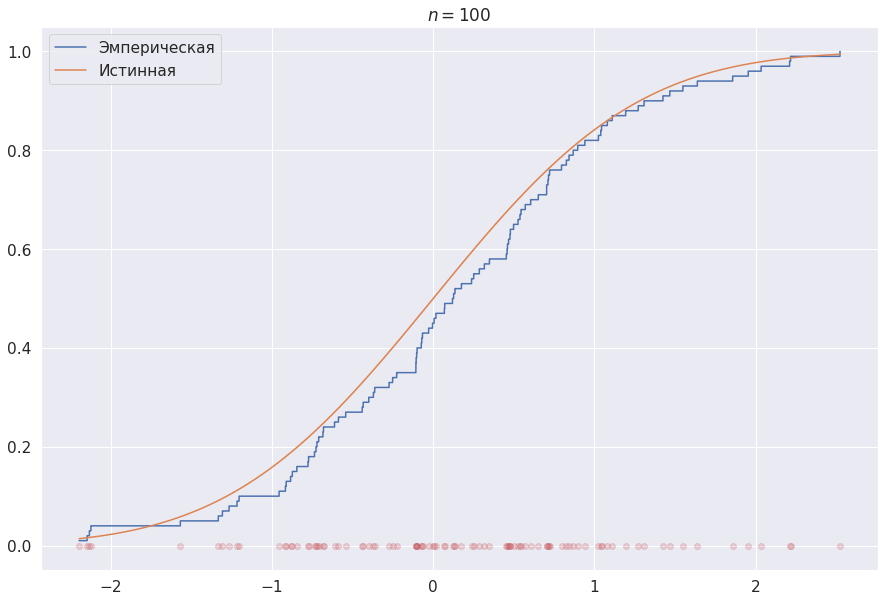

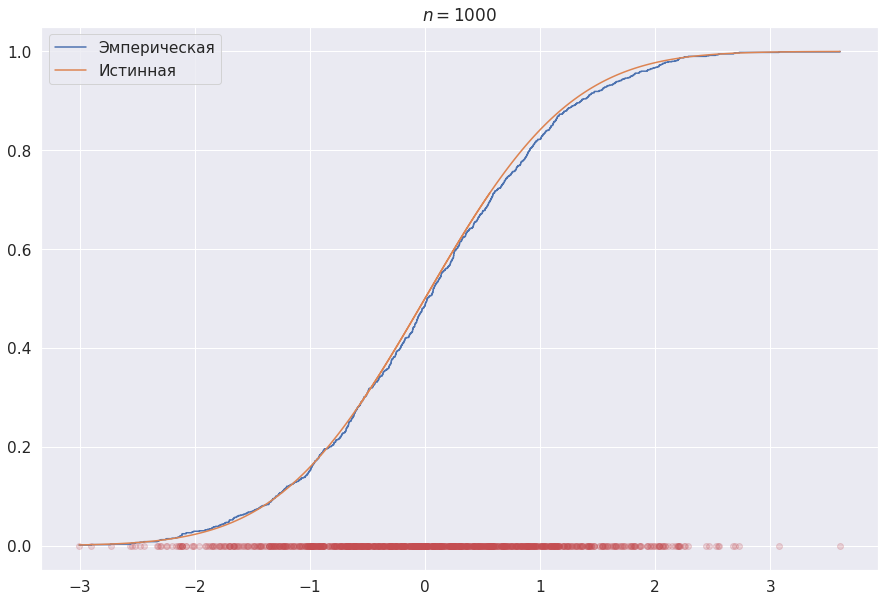

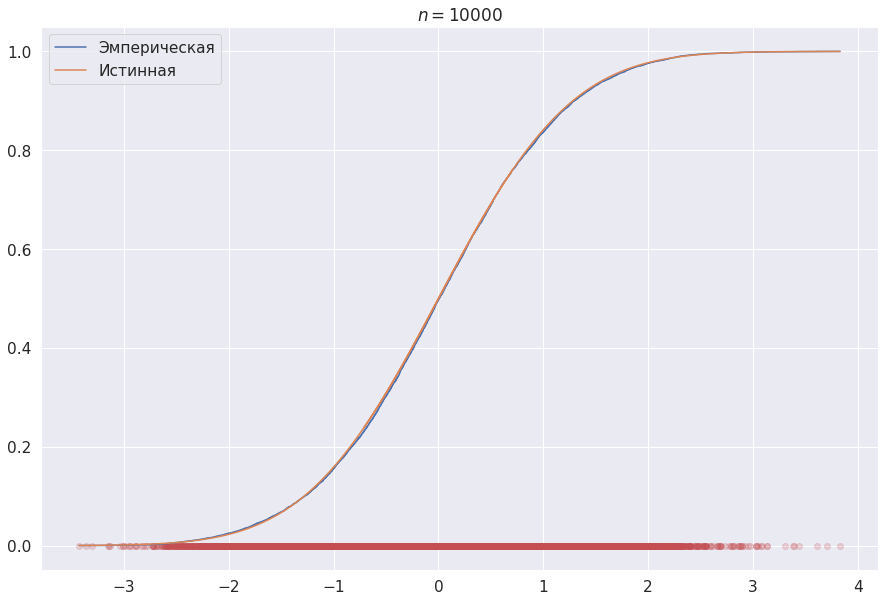

In [20]:
cdf = sps.norm.cdf

for n in [10, 25, 50, 100, 1000, N]:
    plt.figure(figsize=(15, 10))
    plt.title('$n={0}$'.format(n))
    ecdf_x = np.linspace(sample[0:n].min(), sample[0:n].max(), num=N)
    cdf_x = np.linspace(sample[0:n].min(), sample[0:n].max(), num=N)
    ecdf_y = ecdf[n-1](ecdf_x)
    cdf_y = cdf(cdf_x)

    plt.step(ecdf_x, ecdf_y, label='Эмперическая')
    plt.step(cdf_x, cdf_y, label='Истинная')
    plt.scatter(sample[0:n], np.zeros(n), alpha=0.2, color = 'r', linewidths=1)
    plt.legend()
    plt.show()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


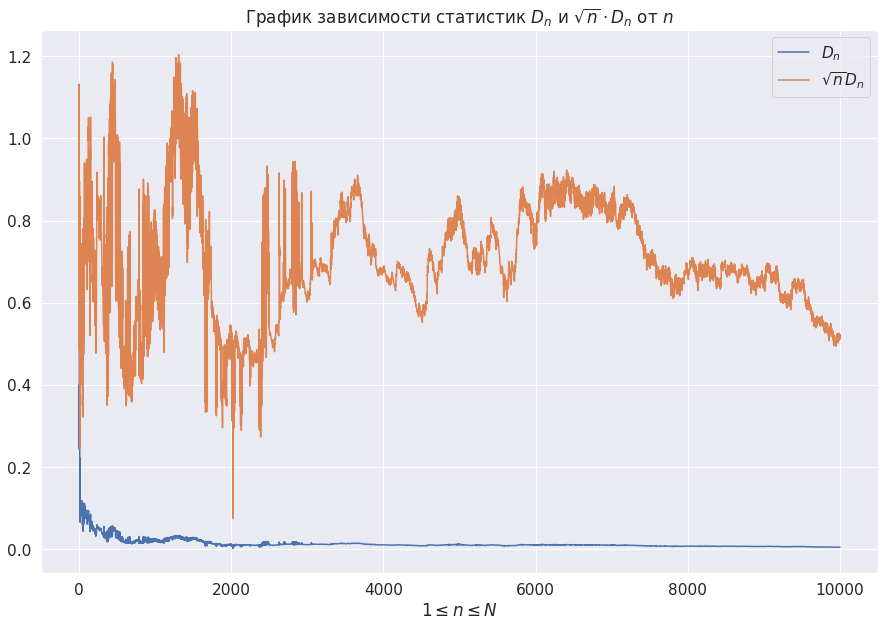

In [21]:
from scipy import optimize

args = np.array([
    optimize.minimize_scalar(lambda x: -abs(ecdf[n - 1](x) - cdf(x))).x 
                 for n in range(1, N + 1)
])

D_n = np.array([abs(ecdf[n - 1](args[n-1]) - cdf(args[n-1])) 
                for n in range(1, N+1)
               ])
sqrt_D_n = np.array([n**(0.5)*D_n[n-1] for n in range(1, N+1)])

plt.figure(figsize=(15, 10))
plt.title('График зависимости статистик $D_n$ и $\sqrt{n} \cdot D_n$ от $n$')
plt.xlabel('$1\leq n \leq N$')
plt.plot(np.linspace(0, N, N), D_n, label="$D_n$")
plt.plot(np.linspace(0, N, N), sqrt_D_n, label="$\sqrt{n}D_n$")
plt.legend()
plt.show()

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

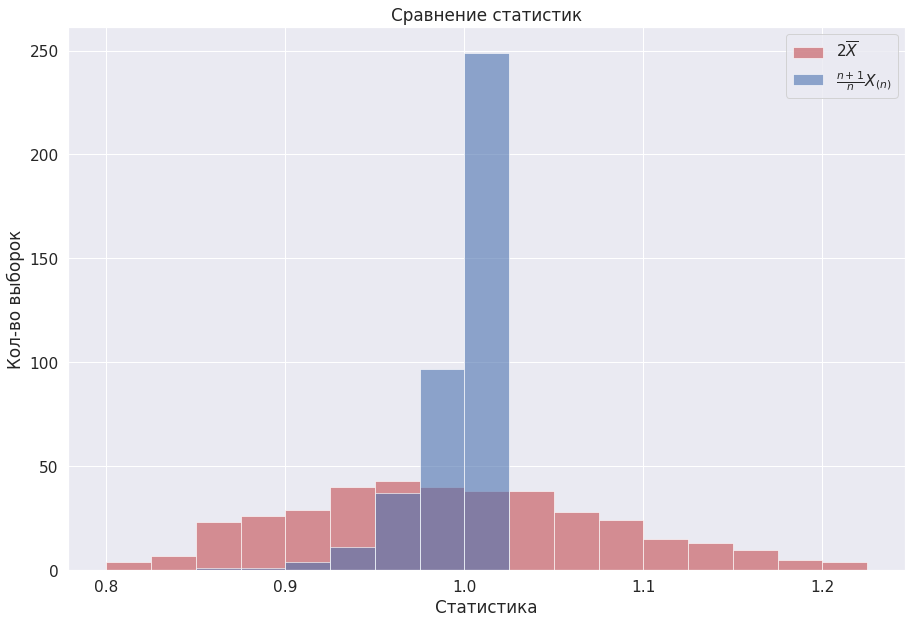

In [22]:
N_samples = 400
N = 40
THETA = 1

bins = [i / 40 + 0.8 for i in range(18)]

samples = sps.uniform.rvs(size=N*N_samples, loc=0, scale=THETA).reshape(N_samples, N)

estimate1 = np.array([2 * samples[i].mean() for i in range(0, N_samples)])
estimate2 = np.array([(N + 1.)/N * samples[i].max() for i in range(0, N_samples)])

fig = plt.figure(figsize=(15, 10))
plt.title('Сравнение статистик')
plt.xlabel('Статистика')
plt.ylabel('Кол-во выборок')
plt.hist(estimate1, color='r', alpha=0.6, bins=bins, label='$2\overline{X}$')
plt.hist(estimate2, color='b', alpha=0.6, bins=bins, label='$\\frac{n+1}{n} X_{(n)}$')
plt.legend()
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

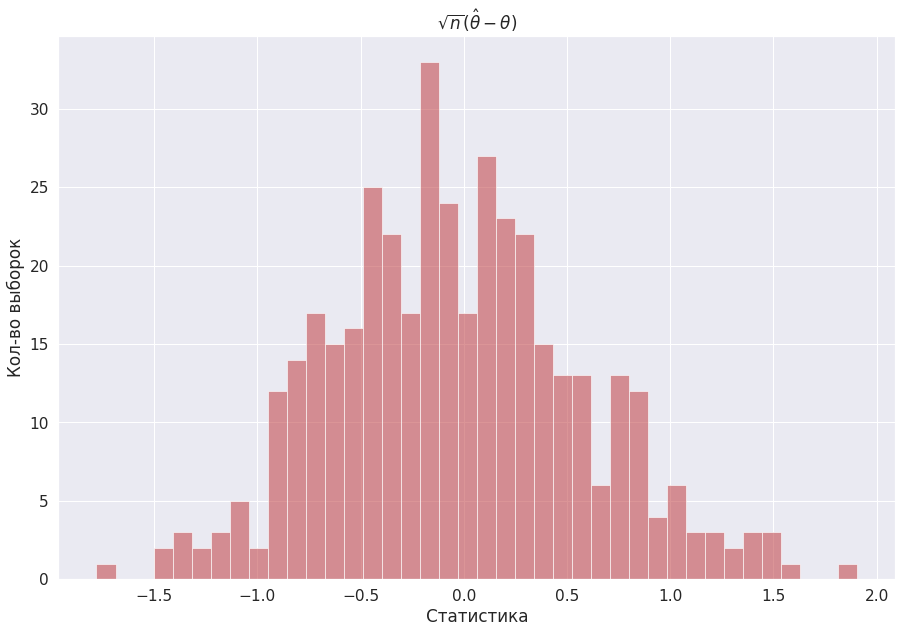

In [23]:
stat1 = N**(0.5)*(estimate1 - THETA)
stat2 = 1 - N*(estimate2 - THETA)

fig = plt.figure(figsize=(15, 10))
plt.title('$\sqrt{n} (\hat\\theta - \\theta)$')
plt.xlabel('Статистика')
plt.ylabel('Кол-во выборок')
plt.hist(stat1, color='r', alpha=0.6, bins=40)
plt.show()

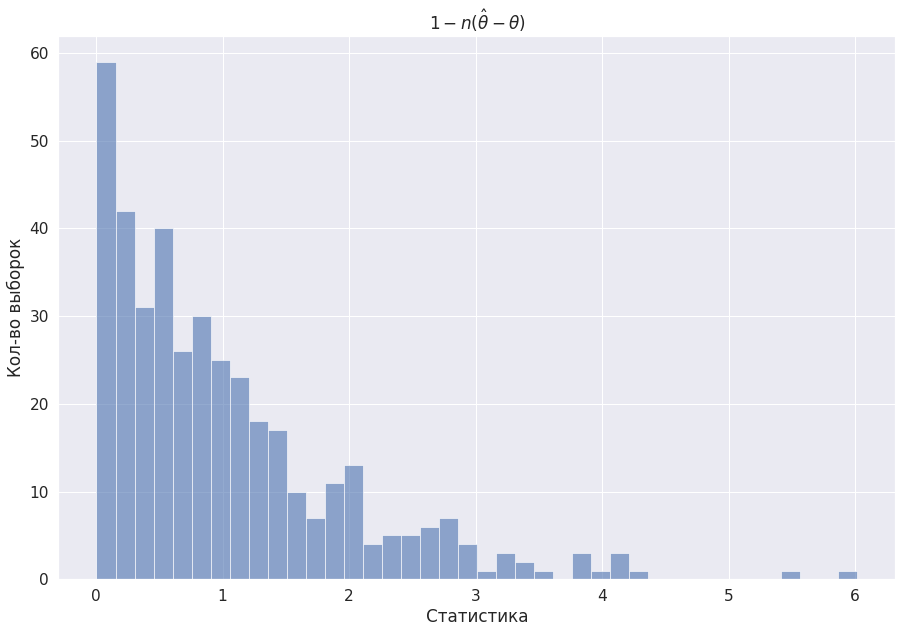

In [24]:
fig = plt.figure(figsize=(15, 10))
plt.title('$1 - n(\hat\\theta - \\theta)$')
plt.xlabel('Статистика')
plt.ylabel('Кол-во выборок')
plt.hist(stat2, color='b', alpha=0.6, bins=40)
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Гистограмма для $\sqrt{n}(\hat\theta - \theta)$ - похожа на нормальное распределение

Гистограмма для $1-n(\hat\theta - \theta)$ - похожа на экспоненциальное распределение

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.


**Ответ**:
По ЦПТ:
$$
\sqrt{n}(\hat\theta - \theta) = \sqrt{n}(2\frac{\sum_{i=1}^{n}X_i}{n} - \theta) = \frac{\sum_{i=1}^{n}2x_i - nE2X_1}{\sqrt{n}} \xrightarrow{d} N(0, 4DX_1)
$$

$$
\sqrt{n}\frac{(\hat\theta - \theta)}{2\sqrt{DX_i}} \xrightarrow{d} N(0, 1)
$$
$$
\sigma(\theta) = 4DX_i = 4\frac{\theta^2}{12} = \frac{\theta^2}{3}
$$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

In [25]:
param = 1./3
stat = stat1/(param**(0.5))

<ipython-input-26-677fcb79f3ae>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


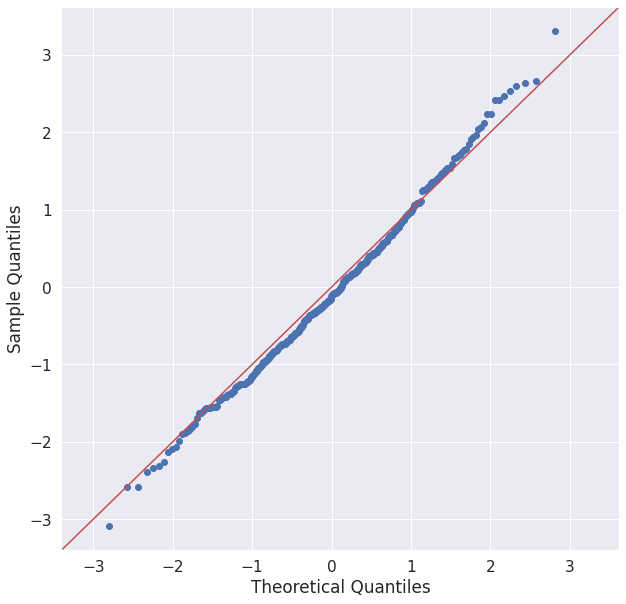

In [26]:
import statsmodels.api as sm


theta_norm = stat
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**
Можно утверждать, что выборка взята из нормального распределения, т.к. линии почти совпадают.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Экспоненциальное

<ipython-input-27-b2dd40016ec2>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


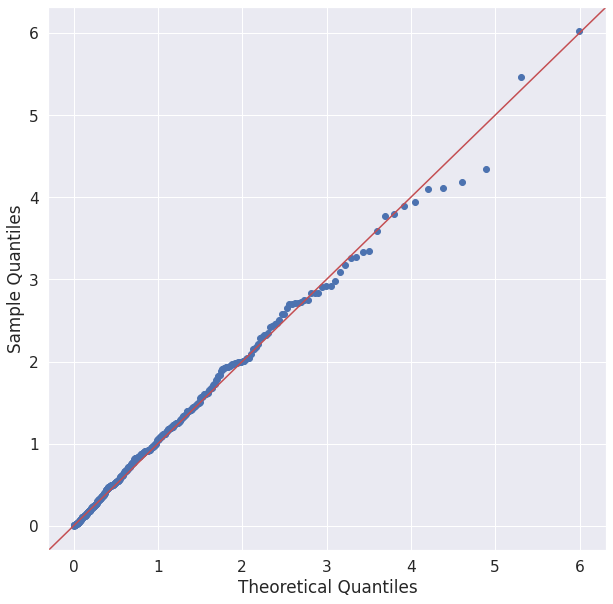

In [27]:
theta_norm = stat2
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, dist=sps.expon, line='45', ax=ax)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**
 - Нет неплохо, скорость сходимости может оказаться лучше, чем $\frac{1}{\sqrt{n}}$
 - Оценка $\hat\theta$ - асимптотически нормальна, значит скорость сходимости имеет порядок $\frac{1}{\sqrt{n}}$
 - Оценка $\theta^*$ - выгоднее, т.к. ёё скорость сходимости имеет порядок $\frac{1}{n}$


**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.